# Import all the necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score, precision_score
from sklearn import tree

In [2]:
df=pd.read_excel('car_evaluation.xlsx')

# let's check some sample of our datasets

In [3]:
df.sample(15)

,vhigh,vhigh.1,2,2.1,small,low,unacc
365,vhigh,low,3,4,big,low,unacc
491,high,vhigh,4,2,big,low,unacc
1278,med,low,5more,4,small,med,acc
1401,low,vhigh,5more,more,big,med,acc
956,med,vhigh,5more,4,med,low,unacc
371,vhigh,low,3,more,med,low,unacc
134,vhigh,high,3,2,small,low,unacc
324,vhigh,low,2,2,small,med,unacc
1623,low,low,2,2,med,med,unacc
1345,low,vhigh,3,more,med,high,acc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# As we observed from the info methods we have seven objects and total 1727 in each objects and let's check it's null value, it have no null values we can check it also from the info method all objects have the same 1727.

In [5]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [6]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
df.shape

(1727, 7)

# let's change the name of column's as given in our datadictinary buying, maintainance, doors, persons and etc

In [8]:
df.columns = ['buying','maint', 'doors','persons',
                              'lug_boot','safety','Target']
df.sample(10)

,buying,maint,doors,persons,lug_boot,safety,Target
1134,med,med,4,2,small,med,unacc
11,vhigh,vhigh,2,4,med,low,unacc
1349,low,vhigh,4,2,small,low,unacc
1670,low,low,3,more,big,low,unacc
1296,low,vhigh,2,2,small,med,unacc
17,vhigh,vhigh,2,more,small,low,unacc
218,vhigh,med,2,2,med,low,unacc
1725,low,low,5more,more,big,med,good
640,high,high,5more,more,small,high,acc
1126,med,med,3,more,small,high,acc


#let count values we have in all 7 objects and we will observe the unique values in data too.

In [9]:
df['buying'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64

In [10]:
df['maint'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64

In [11]:
df['doors'].value_counts()

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64

In [12]:
df['persons'].value_counts()

4       576
more    576
2       575
Name: persons, dtype: int64

In [13]:
df['lug_boot'].value_counts()

med      576
big      576
small    575
Name: lug_boot, dtype: int64

In [14]:
df['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [15]:
df['Target'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Target, dtype: int64

# let visualize some of our given datasets before encoding

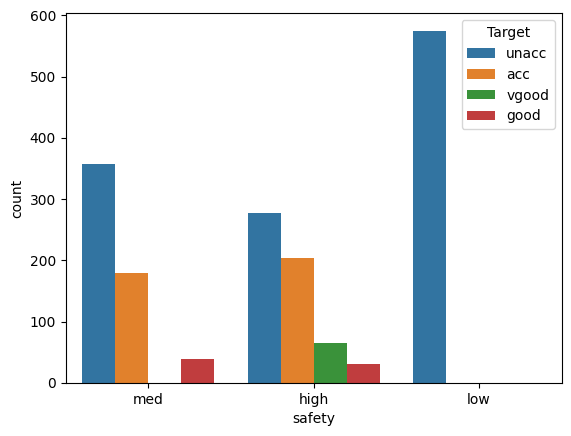

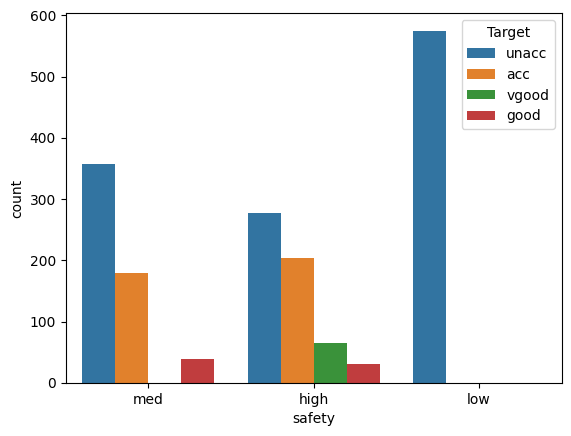

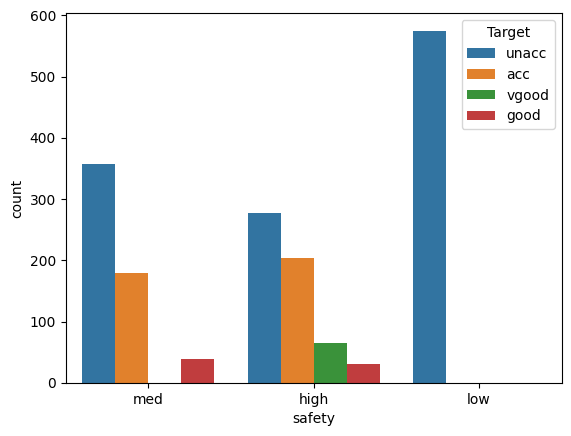

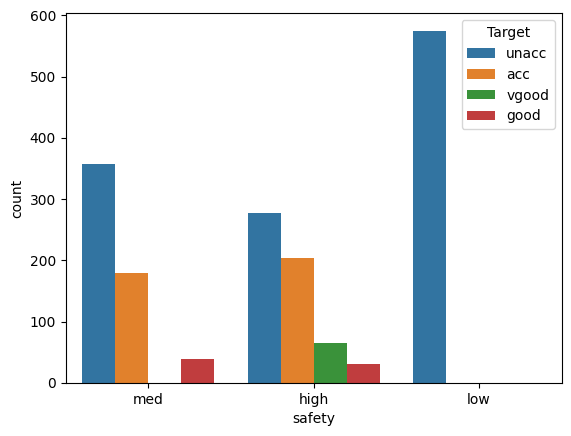

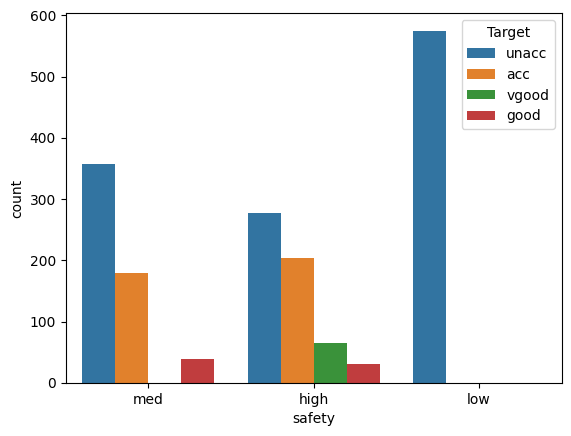

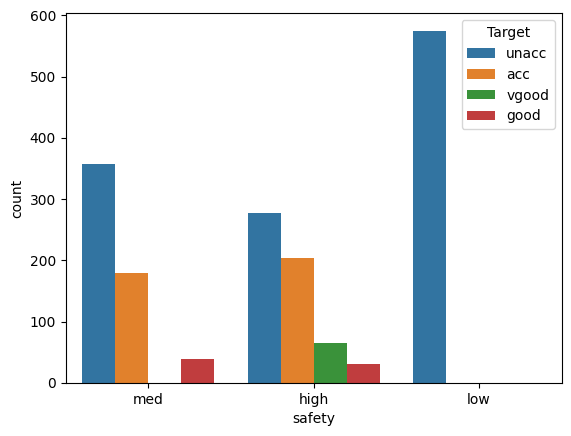

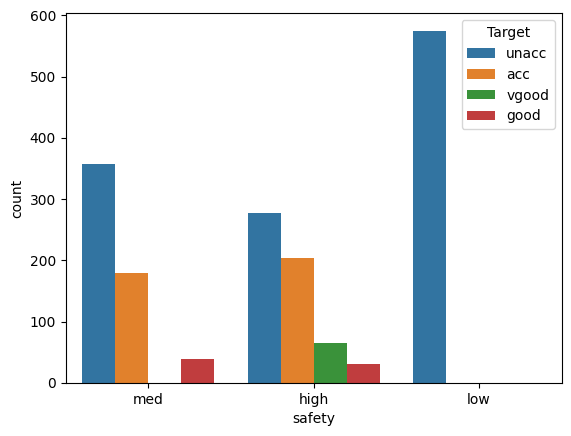

In [16]:
column = df.columns
for i in column:
    sns.countplot(data=df, x="safety", hue="Target")
    plt.xticks(rotation=False)
    plt.show()

# Modeling 
- let's model our given datasets by encoding from categirical given data in to the encoded data by replacing some appropriate encoded data like low by 0, med by 1 and high by 2 and etc

In [17]:
df=df.replace("low",0)
df=df.replace("med",1)
df=df.replace("high",2)
df=df.replace("vhigh",3)
df=df.replace("more",4)
df = df.replace("5more",5)

df = df.replace("small",0)
df=df.replace("big",2)

df=df.replace("unacc",0)
df=df.replace("acc",1)
df=df.replace("good",2)
df=df.replace("vgood",3)

# let's see some  ten sample of our encoded datasets how it look like

In [18]:
df.sample(10)

,buying,maint,doors,persons,lug_boot,safety,Target
1597,0,1,5,2,1,2,0
1443,0,2,3,4,1,1,1
390,3,0,4,4,1,1,1
831,2,0,4,4,1,1,1
149,3,2,3,4,2,0,0
204,3,2,5,4,2,1,0
1479,0,2,4,4,1,1,1
1073,1,2,5,4,1,0,0
1227,1,0,3,4,1,1,1
1116,1,1,3,4,0,1,1


In [19]:
df.to_csv("encoded_data.csv", index=False) # save  the encoded data format

# let's us classify the decision part from the predict part by assigning decision part to x and predict part to the y.
- we have to drop the target column from the decision part because it's the predicted part  and assign to x
- we have to assign the target to y and predict it later.

In [20]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [21]:
X.sample(5) # the decision part loook like this.

,buying,maint,doors,persons,lug_boot,safety
691,2,1,3,4,2,2
597,2,2,4,2,1,1
775,2,0,2,4,0,2
1257,1,0,4,4,2,1
264,3,1,3,4,1,1


# let's we see the correlation between objects and observe it.

<AxesSubplot: >

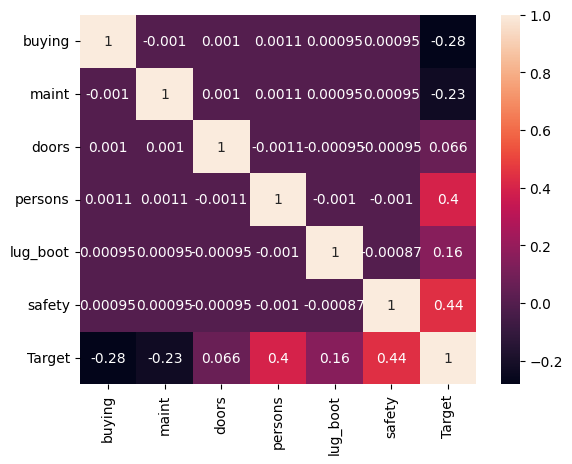

In [22]:
sns.heatmap(df.corr(), annot=True)

# we can observe how their correlations look like 
- the correlation in the main diagonal is 1 which means they are more correlated as they are the same.
- some of the correlation have negative correlation which means a relationship between two variables in which one variable increases as the other decreases, and vice versa
- some of the correlation have postive correlation which means both are increasing or decreasing together

# Classification of data into train and test part

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Out of %d total number of points incorrectly labelled: %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Out of 346 total number of points incorrectly labelled: 15


# Confusion matrix

<AxesSubplot: >

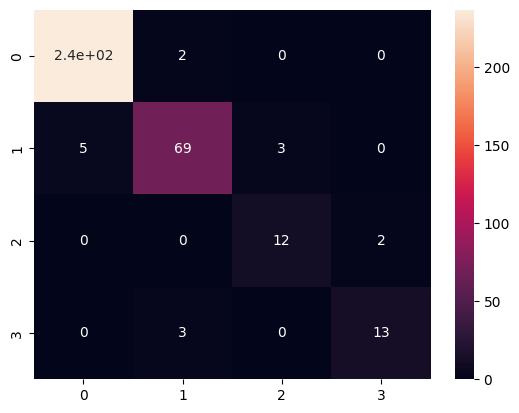

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Classification Report

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       239
           1       0.93      0.90      0.91        77
           2       0.80      0.86      0.83        14
           3       0.87      0.81      0.84        16

    accuracy                           0.96       346
   macro avg       0.89      0.89      0.89       346
weighted avg       0.96      0.96      0.96       346



# Decision Tree

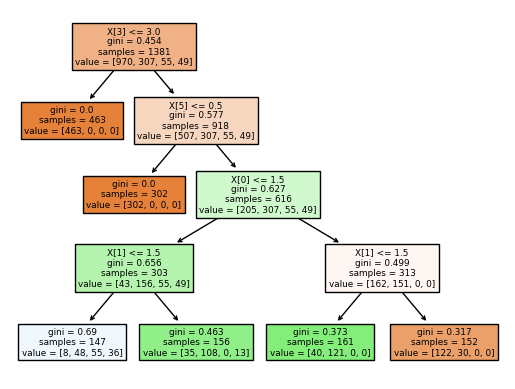

In [30]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)
clf.fit(X_train, y_train)
tree.plot_tree(clf,
               filled = True);

In [28]:
Accuracy = accuracy_score(y_test,y_pred)    
print("Accuracy: {}%".format(Accuracy*100))

Accuracy: 95.66473988439307%


# Final Accuracy of Decision tree was= 95.665%